                               #######             
                              #                    
        ############ -#####+.##     ######         |	DataDrivenConstruction.io
        ##+########## .-##+ #-   .+########        |	
        ####     ####.     ..    #      ###        |	Dive into the future of flexibility in processing data 
        ####     .#+#.     #    .# .               |	without using BIM tools!
        ####     -#+#.    #.     .#.               |	
        ####      #+#.   ##-                       |	
        ####     ####        #.  #     -####       |	
        ############  .###+ #. ############        |
        #########.   +#### #+.   ########          |	If you have any questions, concerns or special requests,
                           #+                      |	please contact us at info@datadrivenconstruction.io	
                          #                        
                         #  

To work with data in Jupyter Notebook, we first need to **load the project dataset** obtained during conversion (in this case, it is the rac_basic_sampe.rvt project)

In [4]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
df = pd.read_excel(r'C:\Revit_Projects\2021 racbasicsampleproject_rvt.xlsx')

In [5]:
df.head()  #Show the first 5 lines of the Dataframe

,ID,Name,Category,Color,Comments,Cost,Description,Design Option,Export to IFC,Export to IFC As,...,Pipe,Bracket Material,Cushion Material,Base Material,Top Material,Cushion/Chair Back Material,Bottle Material,Cap Material,Contents,Aalto Vase Material
0,24.0,Default Wall,OST_Materials,8421504.0,NaN,0.0,NaN,None,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.0,Default Roof,OST_Materials,32512.0,NaN,0.0,NaN,None,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26.0,Glass,OST_Materials,12615680.0,NaN,0.0,Soda Lime Glass,None,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29.0,Phase - Temporary,OST_Materials,8323072.0,NaN,0.0,NaN,None,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,299.0,Color Fill Legend,OST_ColorFillLegends,0.0,NaN,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Write parameters into the variables
parameter_1 = 'Type Name'
parameter_2 = 'Volume'

#Summing the entire project for one parameter and summing values in another parameter
dfg = df.groupby(parameter_1)[parameter_2].sum()
dfg

Type Name
 2                   0.000000
01 Cotton            9.049003
0810mm               1.719328
1                    0.000000
1.5mm Arial          0.000000
                     ...     
hood enclosure       1.551020
revitlogo.bmp        0.000000
small                0.000000
wardrobe           137.303424
water             1361.160300
Name: Volume, Length: 294, dtype: float64

In [7]:
#Group the project by the number of elements in the group
dfcc = df.groupby(parameter_1)[parameter_2].count()
dfcc

Type Name
 2                0
01 Cotton         1
0810mm            1
1                 0
1.5mm Arial       0
                 ..
hood enclosure    1
revitlogo.bmp     0
small             0
wardrobe          2
water             1
Name: Volume, Length: 294, dtype: int64

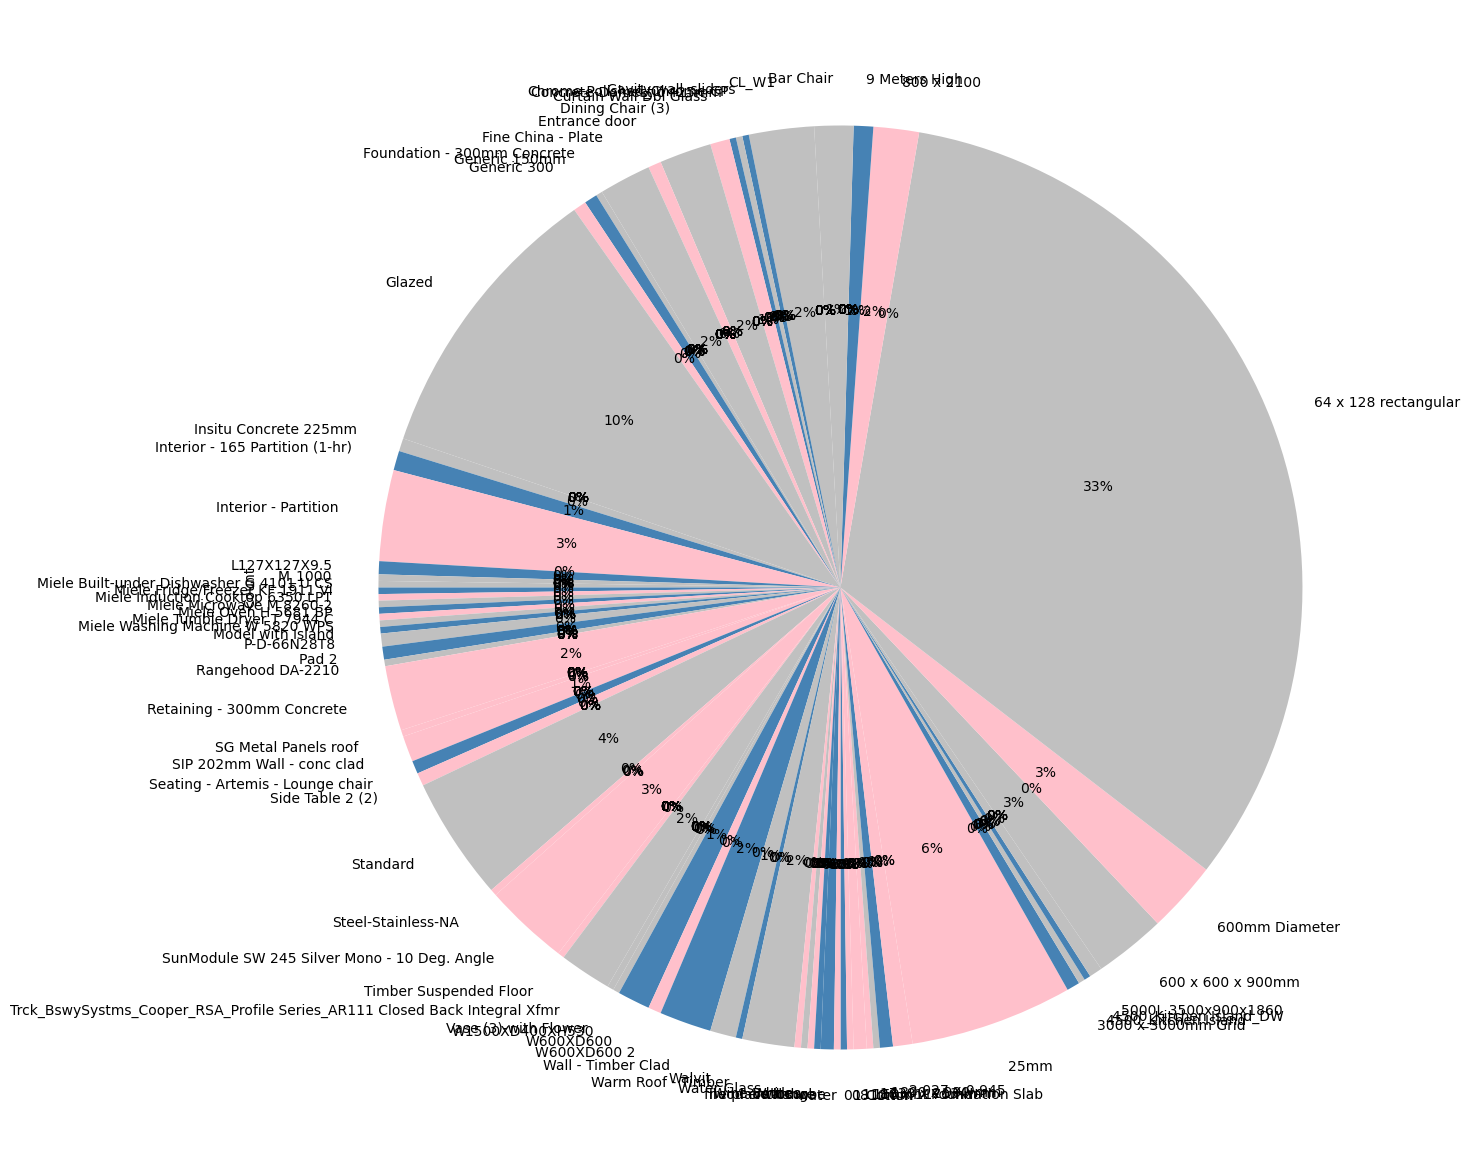

In [12]:
import matplotlib.pyplot as plt

colors_n1 = ['silver', 'steelblue', 'pink']
plot_n1 = dfcc.plot(kind='pie', figsize=(15, 15), autopct='%1.0f%%',colors=colors_n1, startangle=270)
plt.savefig('table_pie1.png', bbox_inches = 'tight') #Save as PNG in Output folder (->)

<Axes: ylabel='Type Name'>

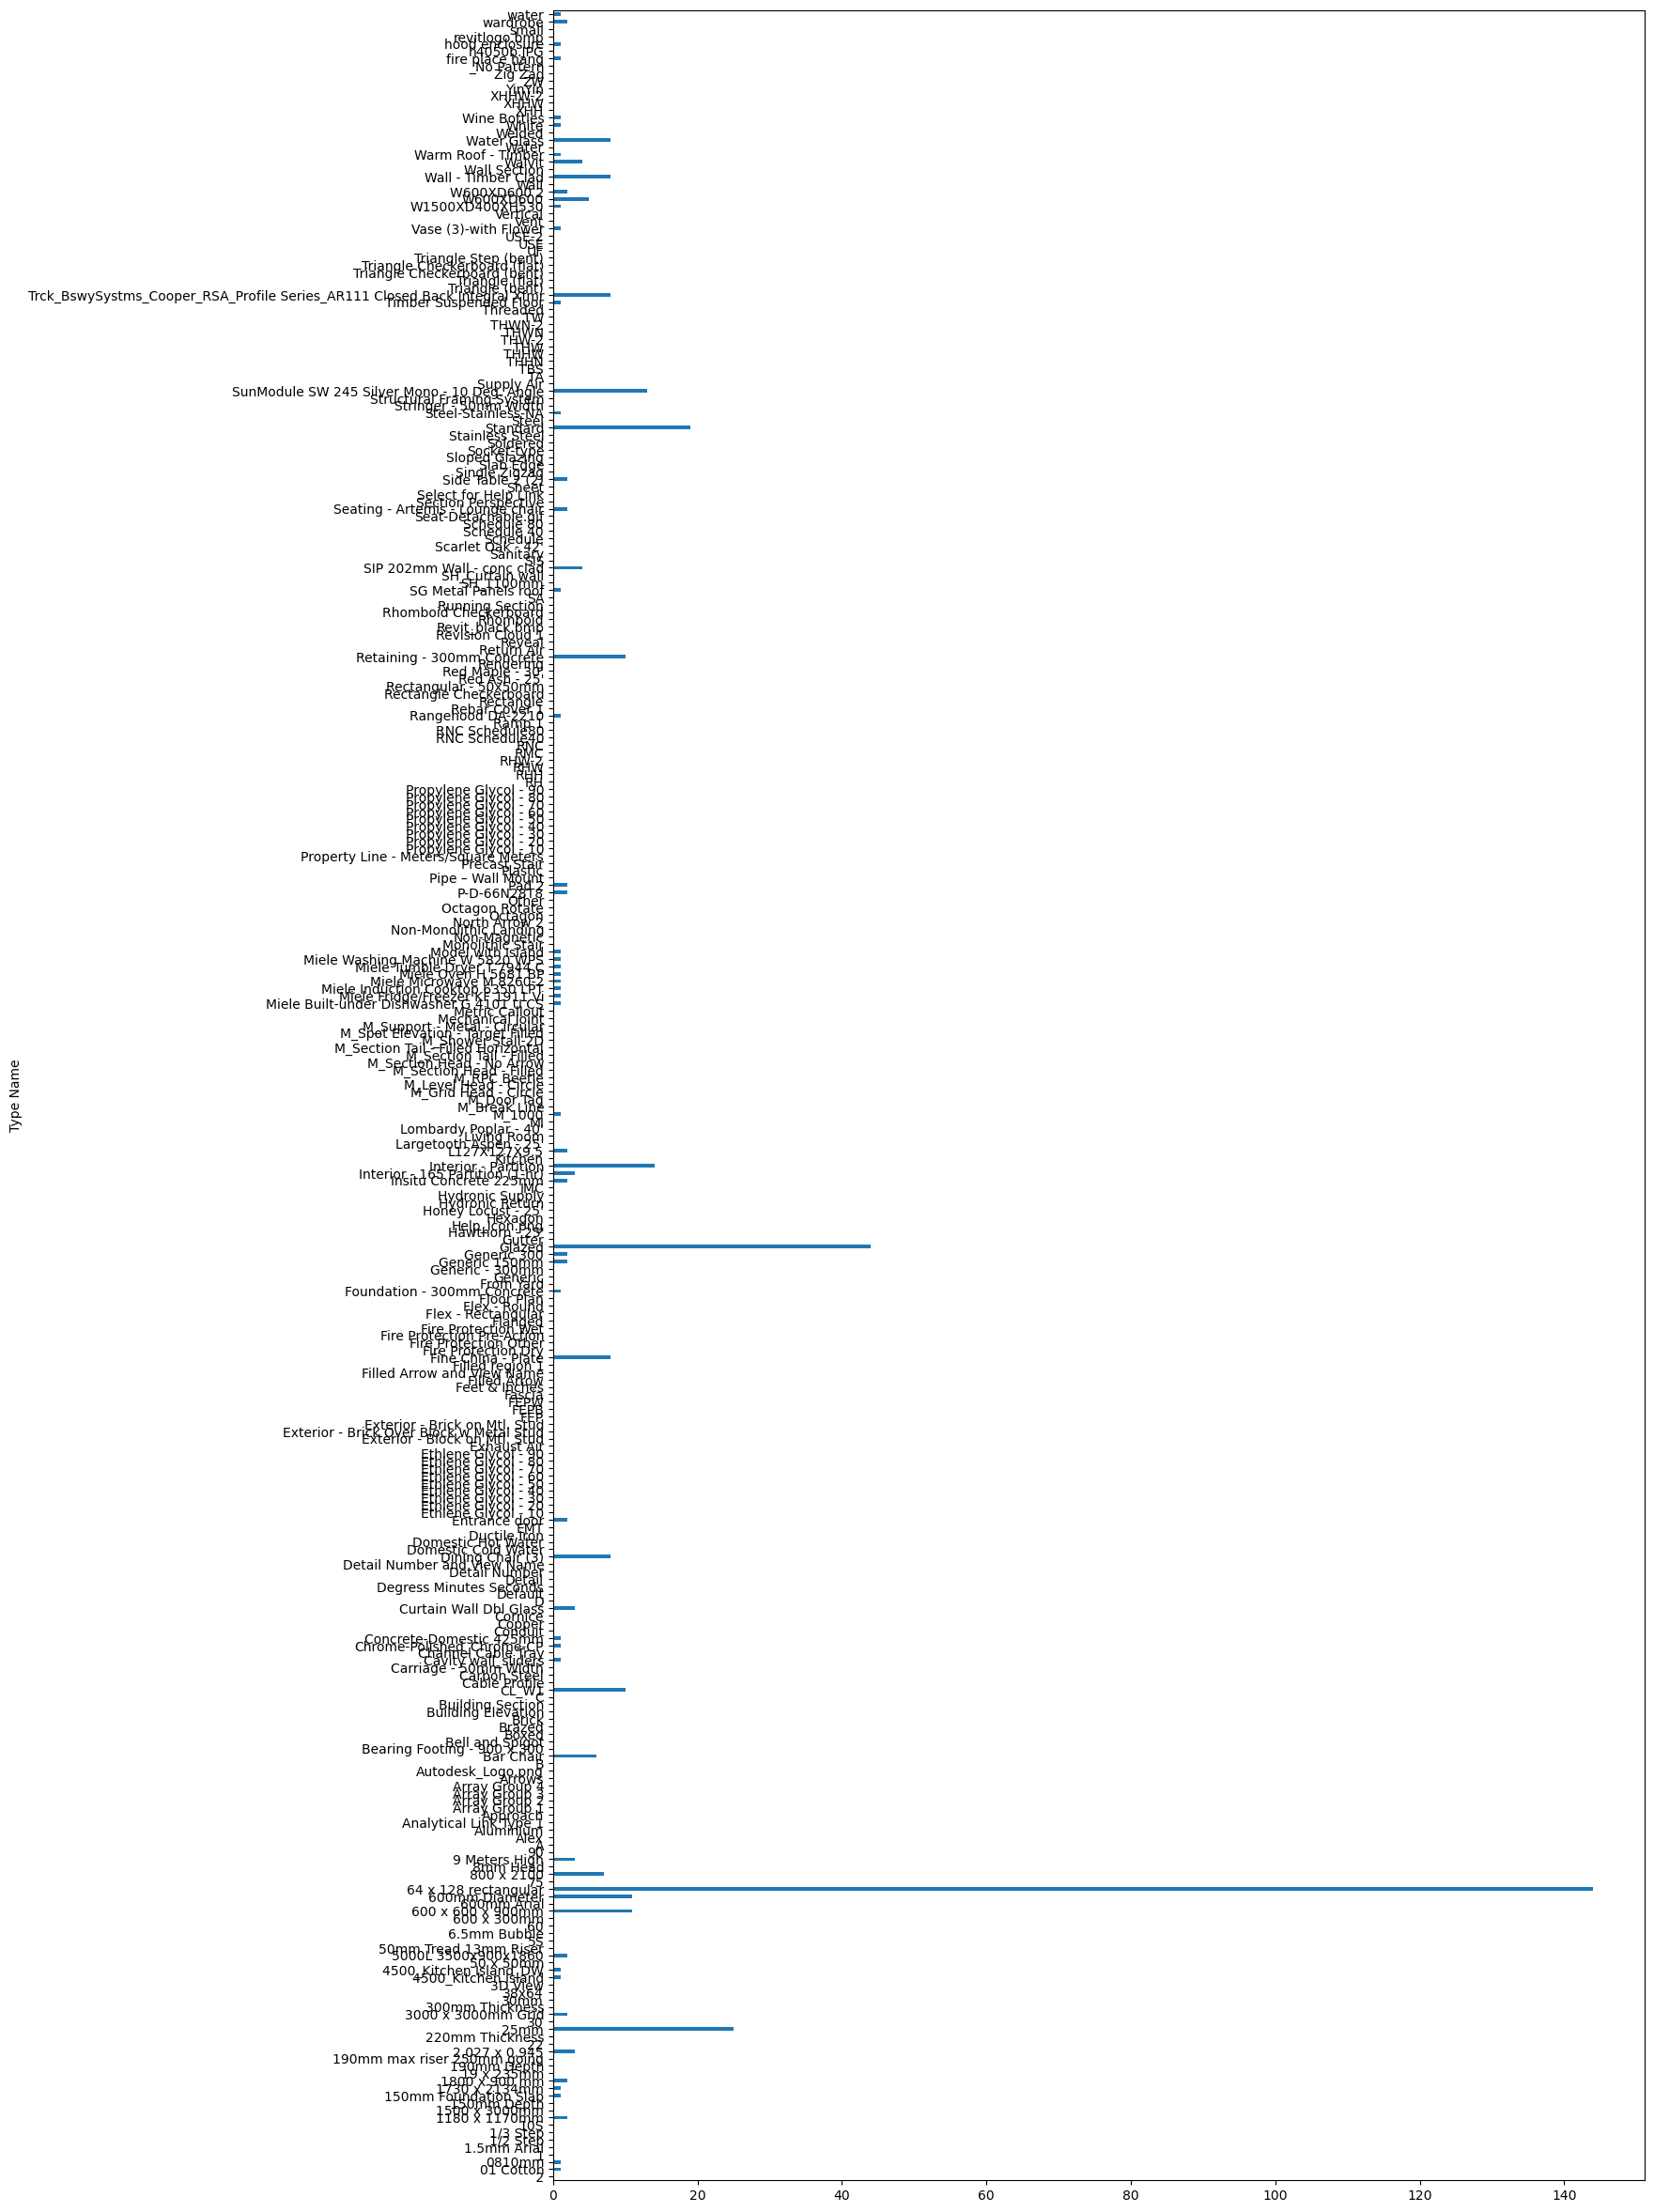

In [14]:
# Visualizing data from the Dataframe
dfcc.plot.barh(figsize=(15,30))

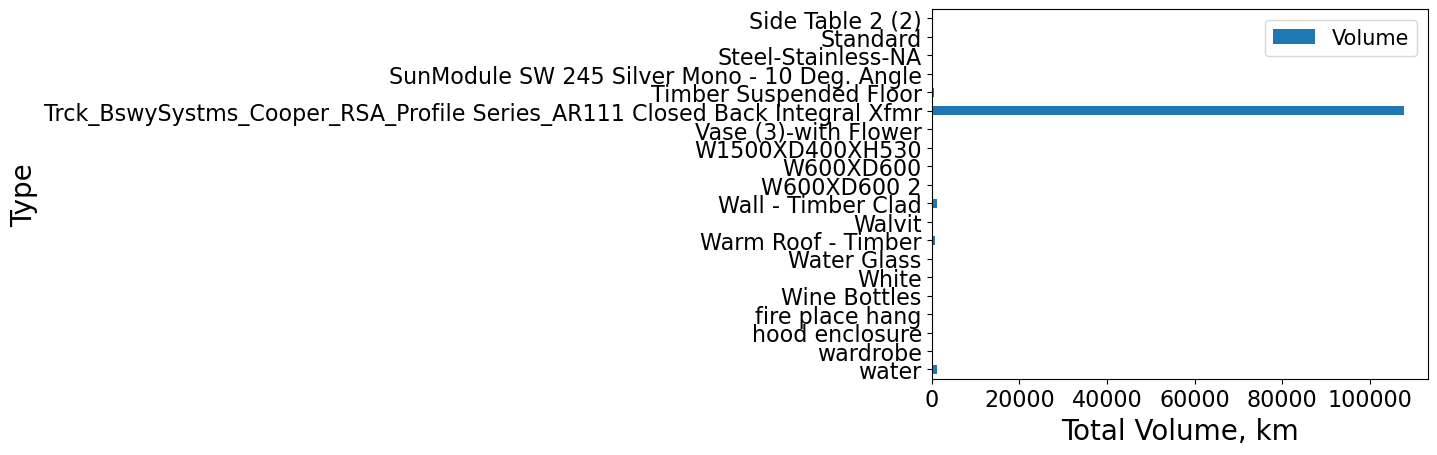

In [15]:
# Let's form a graph with only non-zero values

parameter_2 = 'Volume'
x_label = 'Total ' + parameter_2 +', km'

dfcc = dfcc.rename('Count')
df2 = pd.concat([dfg, dfcc], axis = 1)
df2 = df2[(df2.T != 0).any()]
df2 = df2.sort_values(parameter_1, ascending=False)
ax1 = df2.iloc[:20,:].plot(y=[parameter_2], kind="barh", fontsize = 16)
ax1.legend(fontsize = 15)
ax1.set_ylabel('Type', fontdict={'fontsize':20})
ax1.set_xlabel(x_label, fontdict={'fontsize':20})
plt.savefig('table_vol1.png', bbox_inches = 'tight') #Save as PNG in Output folder (->)

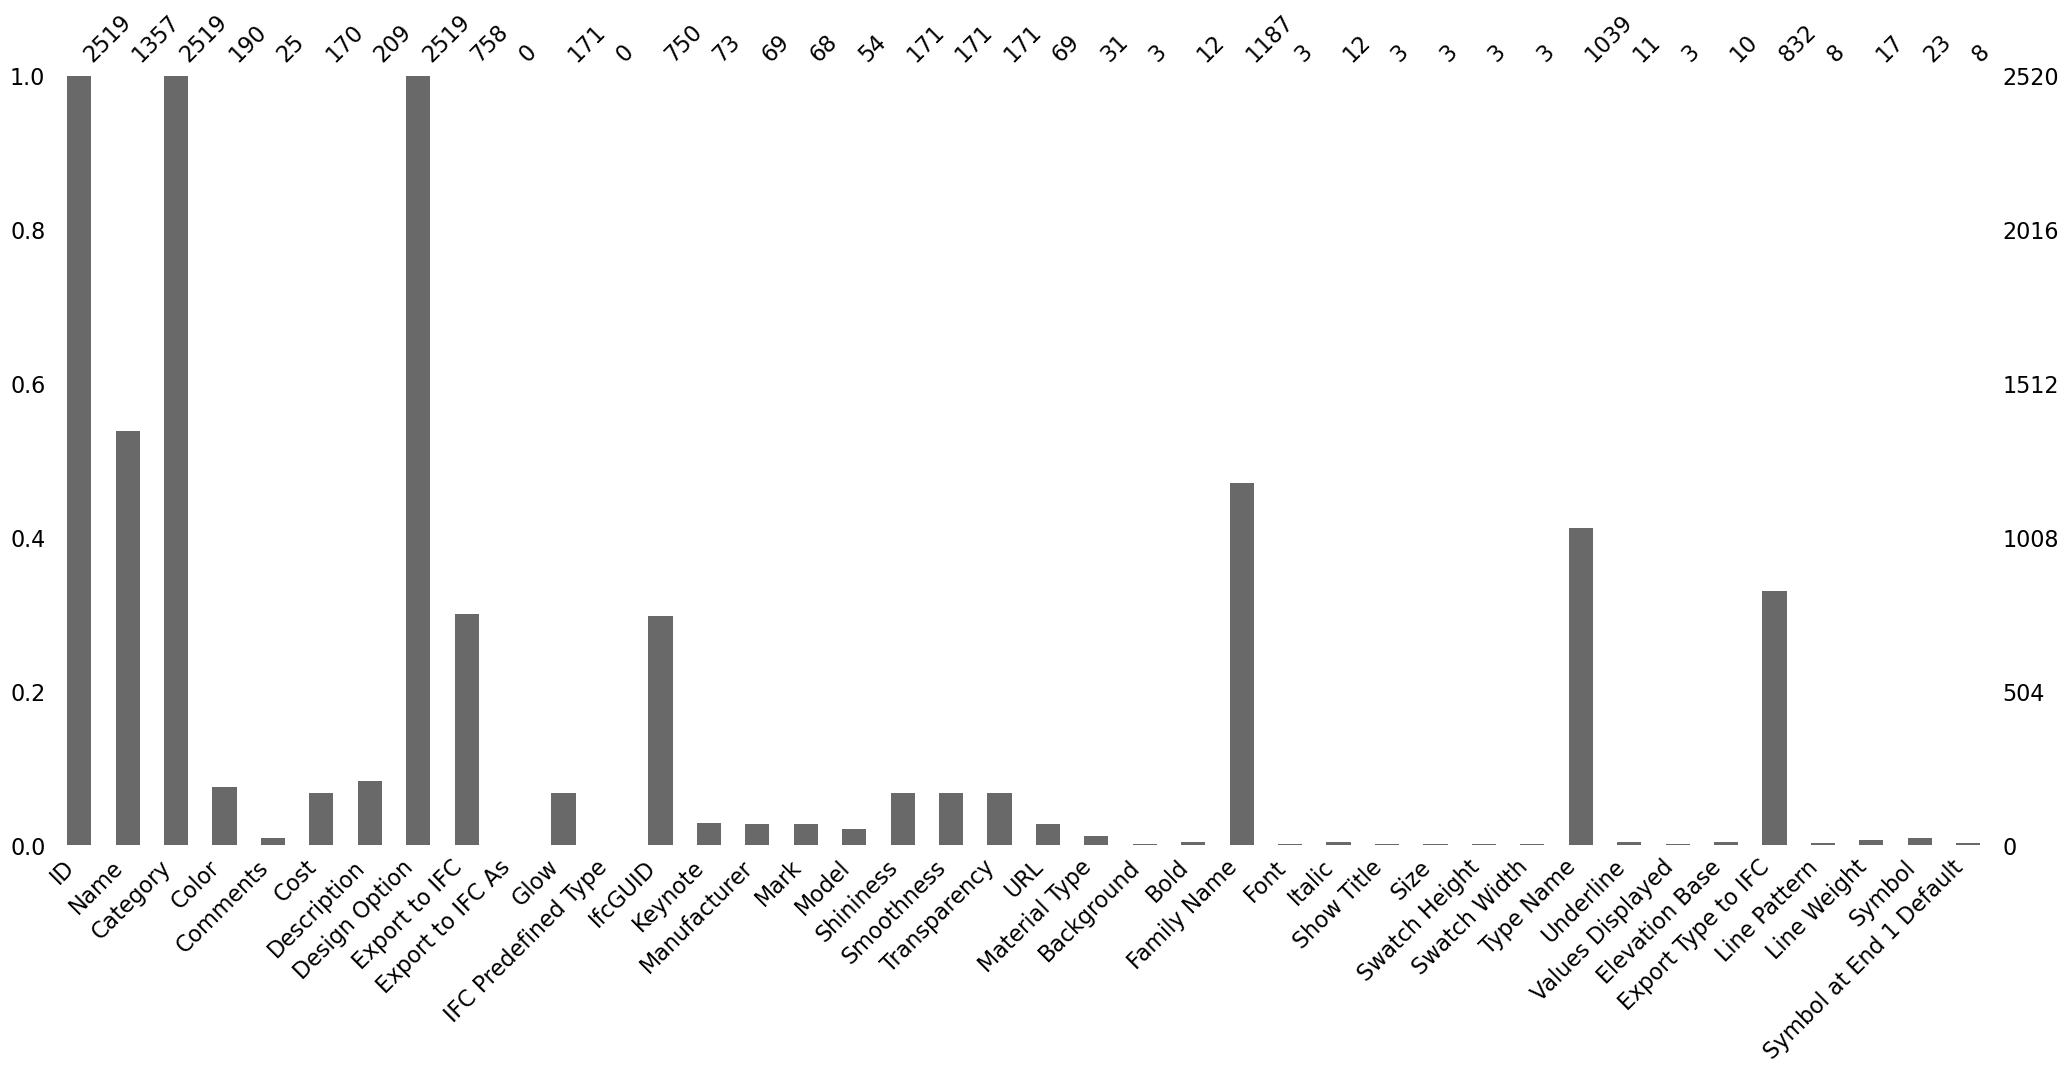

In [16]:
#Let's check if the parameters are filled in

import missingno as msno
figm2 = msno.bar(df.iloc[: , 0:40])
fig_copym2 = figm2.get_figure()
fig_copym2.savefig('plot_pr2asm.png', bbox_inches = 'tight')